In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
from prophet.plot import plot_components_plotly, plot_plotly

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("daily temp.csv")

In [7]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [8]:
df = df[["DATE", "AvgTemp"]]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   AvgTemp  1821 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


In [11]:
df["AvgTemp"].fillna(df["AvgTemp"].mean(), inplace=True)

In [12]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [13]:
df.head()

,DATE,AvgTemp
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


In [15]:
df.columns = ["ds", "y"]

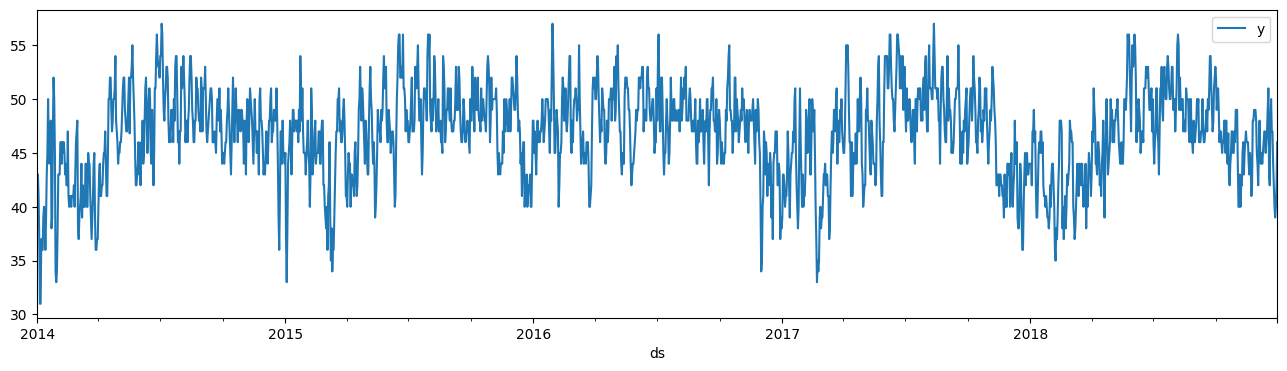

In [18]:
df.plot(x="ds", y="y", figsize=(16, 4))
plt.show()

In [19]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [21]:
train.shape, test.shape

((1460, 2), (365, 2))

In [22]:
model = Prophet()

In [23]:
model.fit(train)

19:38:38 - cmdstanpy - INFO - Chain [1] start processing
19:38:39 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
train.tail()

,ds,y
1455,2017-12-26,44.0
1456,2017-12-27,45.0
1457,2017-12-28,43.0
1458,2017-12-29,43.0
1459,2017-12-30,44.0


In [26]:
future_dates = model.make_future_dataframe(periods=365)

In [27]:
forecast = model.predict(future_dates)

In [29]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1820,2018-12-26,46.268723,36.640813,45.846056,44.710575,47.806472,-4.887708,-4.887708,-4.887708,-0.059834,-0.059834,-0.059834,-4.827874,-4.827874,-4.827874,0.0,0.0,0.0,41.381015
1821,2018-12-27,46.268103,37.112002,45.999260,44.704749,47.815638,-4.747623,-4.747623,-4.747623,0.097827,0.097827,0.097827,-4.845449,-4.845449,-4.845449,0.0,0.0,0.0,41.520480
1822,2018-12-28,46.267483,37.353699,46.214284,44.696765,47.824278,-4.408644,-4.408644,-4.408644,0.425980,0.425980,0.425980,-4.834623,-4.834623,-4.834623,0.0,0.0,0.0,41.858839
1823,2018-12-29,46.266863,36.631860,46.091143,44.689360,47.832583,-4.788772,-4.788772,-4.788772,0.006752,0.006752,0.006752,-4.795524,-4.795524,-4.795524,0.0,0.0,0.0,41.478091
1824,2018-12-30,46.266242,36.888465,45.836425,44.681955,47.838346,-4.969109,-4.969109,-4.969109,-0.240352,-0.240352,-0.240352,-4.728758,-4.728758,-4.728758,0.0,0.0,0.0,41.297133


In [30]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,39.254749,34.863212,43.274917
1,2014-01-02,39.574747,35.432895,43.964788
2,2014-01-03,40.085611,35.847683,44.404924
3,2014-01-04,39.866874,35.506786,43.655348
4,2014-01-05,39.835220,35.792226,43.824782
...,...,...,...,...
1820,2018-12-26,41.381015,36.640813,45.846056
1821,2018-12-27,41.520480,37.112002,45.999260
1822,2018-12-28,41.858839,37.353699,46.214284
1823,2018-12-29,41.478091,36.631860,46.091143


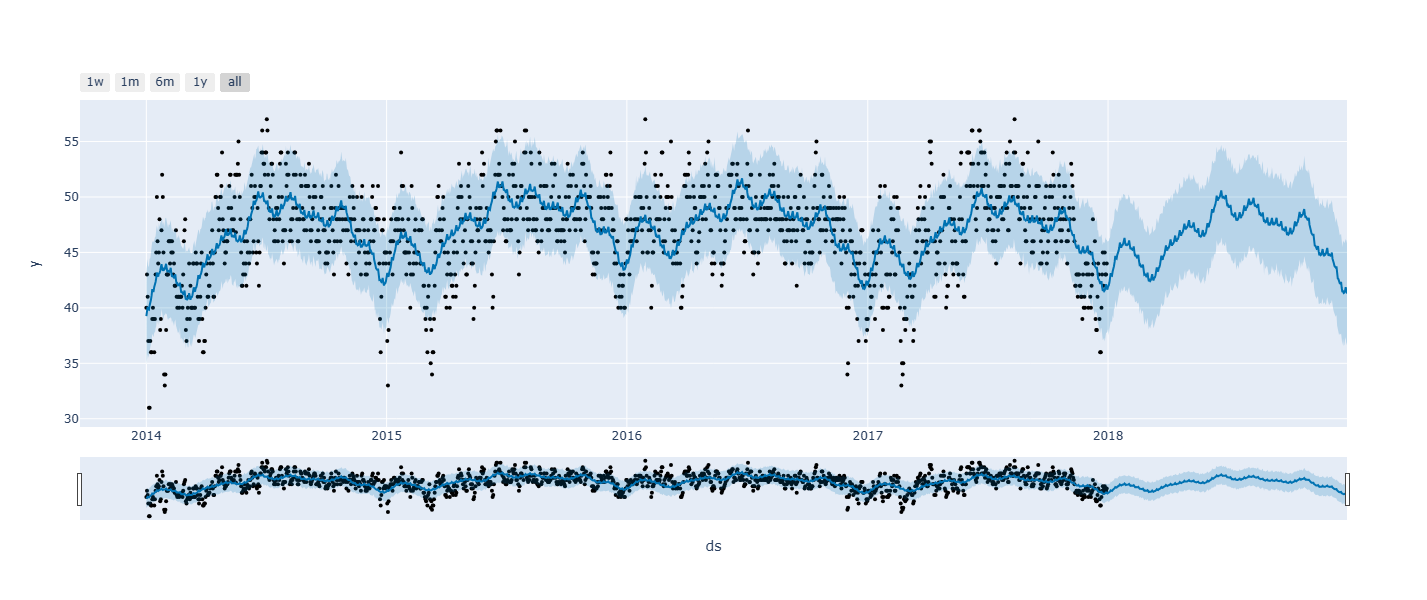

In [33]:
plot_plotly(model, forecast)

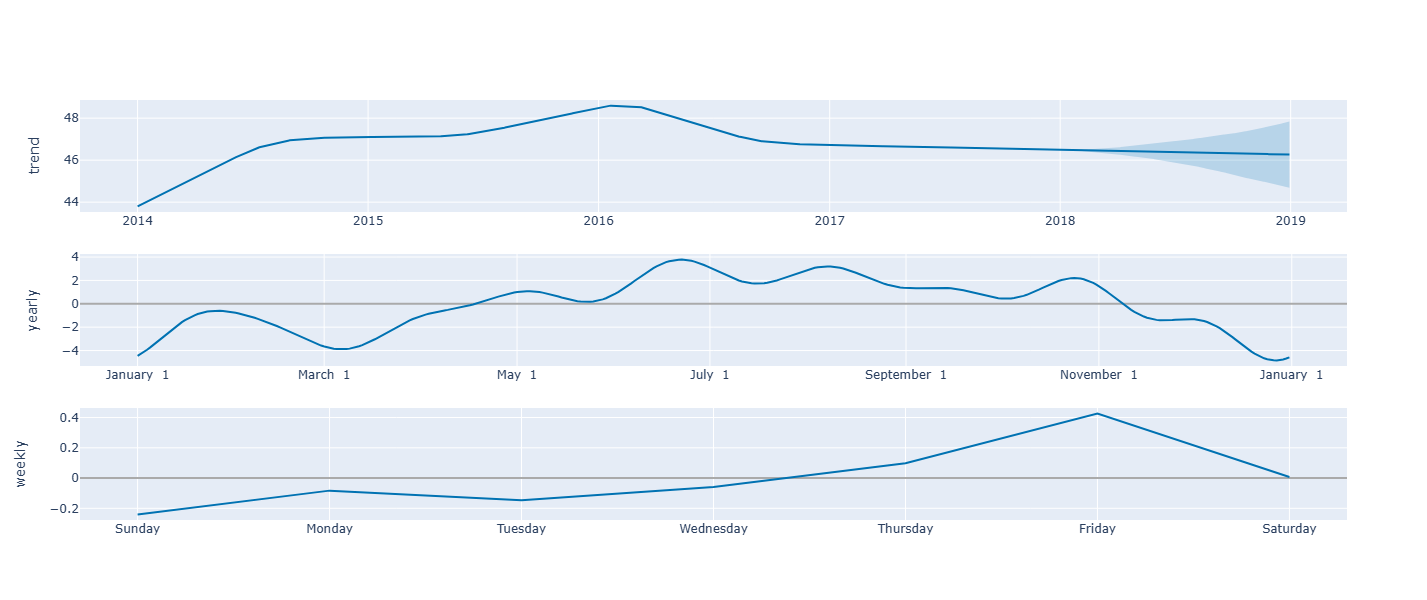

In [34]:
plot_components_plotly(model, forecast)

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
pred = forecast.iloc[-365:]["yhat"]

In [37]:
pred

1460    41.643579
1461    41.924529
1462    42.007196
1463    42.261397
1464    42.603750
          ...    
1820    41.381015
1821    41.520480
1822    41.858839
1823    41.478091
1824    41.297133
Name: yhat, Length: 365, dtype: float64

In [38]:
rmse = np.sqrt(mean_squared_error(test["y"], pred))

In [39]:
rmse

3.458617763904657

In [40]:
test["y"].mean()

46.31183227640992